In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<b>what we can see here is the data does not contain any NaN values or missing values so we can proceed to data visualization</b>

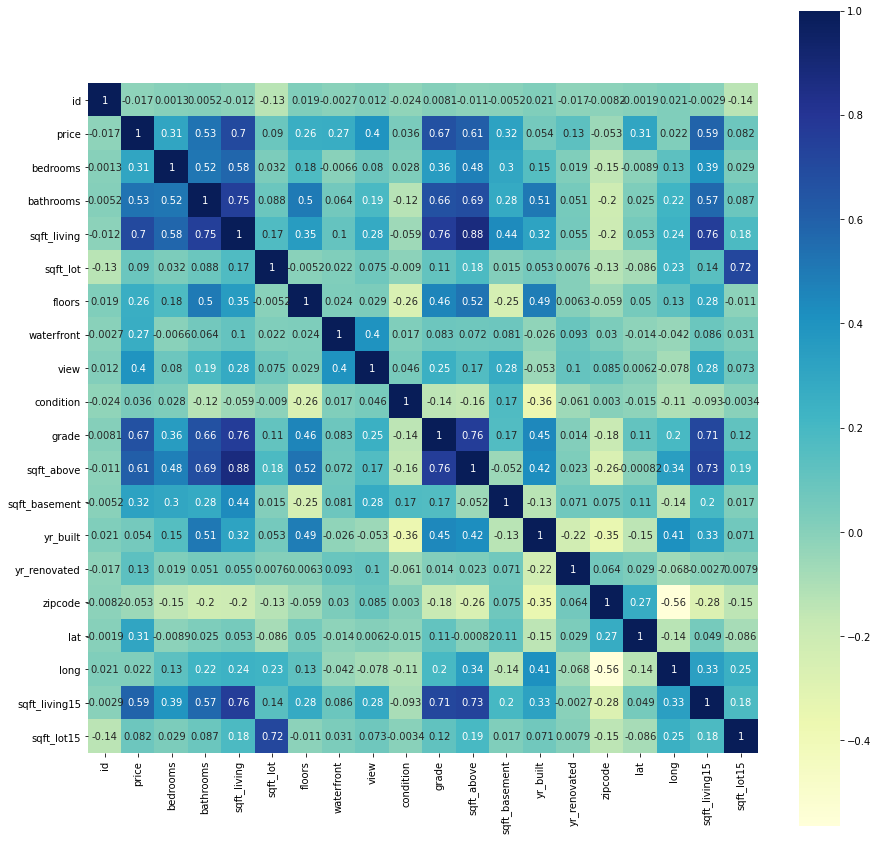

In [5]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",square=True)

<b>From the correlation function, we can notice some features that can help us to create a great model.<br>
So the features we'll work with are those which have the best correlation with our target " price ".<br>
The features we'll use are "sqft_living","grade","sqft_above" and "sqft_living15".<br>
The "yr_built" features is here only for data visulation.<b>

In [6]:
new_df=df[["price","sqft_living","bathrooms","grade","sqft_above","yr_built","sqft_living15"]]
new_df["yr_built"]=pd.qcut(new_df["yr_built"],4,precision=0,labels=["very_old", "old", "recent","pretty_recent"])
new_df

<ipython-input-6-ef157a8aaa16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["yr_built"]=pd.qcut(new_df["yr_built"],4,precision=0,labels=["very_old", "old", "recent","pretty_recent"])


,price,sqft_living,bathrooms,grade,sqft_above,yr_built,sqft_living15
0,221900.0,1180,1.00,7,1180,old,1340
1,538000.0,2570,2.25,7,2170,very_old,1690
2,180000.0,770,1.00,6,770,very_old,2720
3,604000.0,1960,3.00,7,1050,old,1360
4,510000.0,1680,2.00,8,1680,recent,1800
...,...,...,...,...,...,...,...
21608,360000.0,1530,2.50,8,1530,pretty_recent,1530
21609,400000.0,2310,2.50,8,2310,pretty_recent,1830
21610,402101.0,1020,0.75,7,1020,pretty_recent,1020
21611,400000.0,1600,2.50,8,1600,pretty_recent,1410


<b>the error is occurring because we working on a copy of the data frame and it's not affecting our work<b>

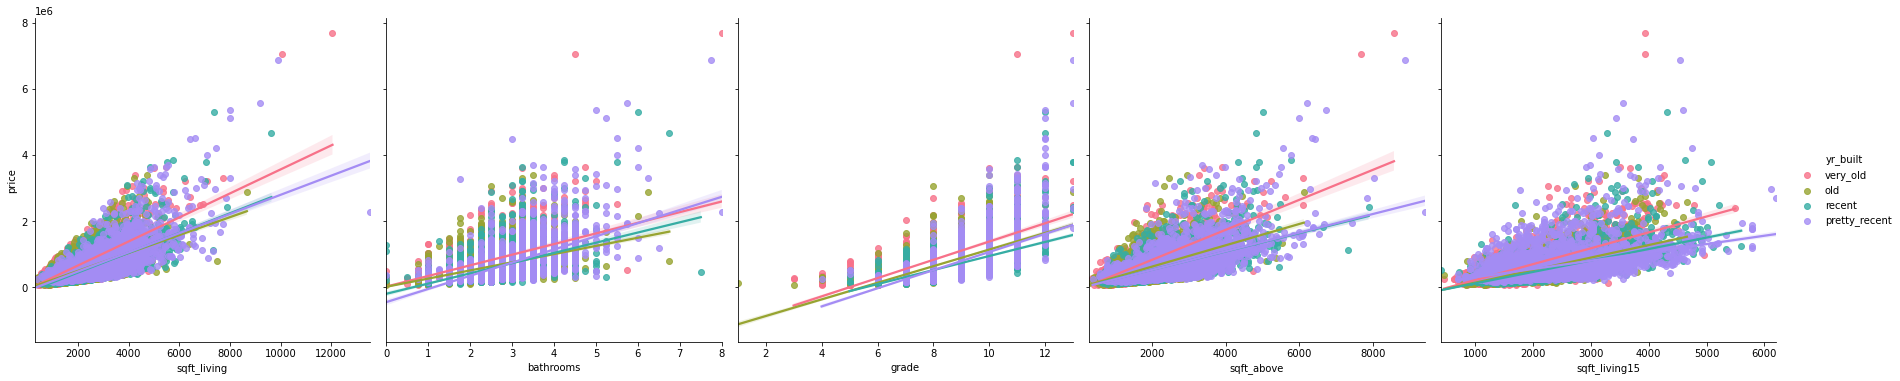

In [7]:
sns.pairplot(new_df,hue="yr_built",x_vars=["sqft_living","bathrooms","grade","sqft_above","sqft_living15"],y_vars="price",height=5,palette="husl",kind="reg")

<b>From this plot, we can notice there is a relation between each feature and the target "price", the more the value of each feature increases the more price increase. This relation also is shown with the parameter -- kind="reg" -- wich plot the linear regression.<br>
Those features are related to human priority when they buy a house or sell it. The first one is the security which is represented here by grade, what we mean by grade is the level of the ground around the house and how it’s graded is the deciding factor of where stormwater will flow. Also, the sqft living in comparison with the nearest neighbors houses is a decisive factor for the price of a house in addition to the sqft of the house without the basement if there is. Bathrooms are also a key factor for the price of the house even if it's bizzare but most people when they buy a house they want more then one bathroom for the whole family.</b>

## 1 - Linear regression 

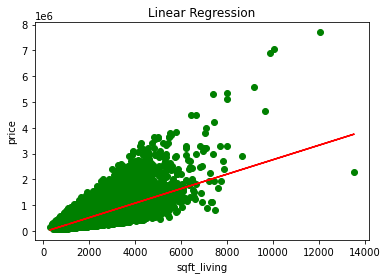

MSE for Linear regression:  67717739739.53198
R squared for Linear regression:  0.494801515513671 



In [9]:
x_lin=new_df["sqft_living"].values.reshape(-1, 1)
y=new_df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x_lin, y, test_size=0.3, random_state=3)
model_lin=LinearRegression()
model_lin.fit(x_train, y_train)
predicted= model_lin.predict(x_test)

plt.plot(x_lin,model_lin.predict(x_lin),color="red")
plt.scatter(x_lin,y,color="green")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.show()

print("MSE for Linear regression: ", metrics.mean_squared_error(y_test, predicted))
print("R squared for Linear regression: ", metrics.r2_score(y_test,predicted),"\n")

# print("coef = ", model_lin.coef_ )
# print("intercept = ", model_lin.intercept_)

<b>analysis of result</b><br>
From the result we just obtained, we can argue that sqft_living has an impact on the price. As we see the R squared it's approximately equal to 0.5 which explains half of the variation of our target " price " and that is explained by human choices. People take several features to give a price for an object in comparison here we just take one feature to predict the price. Also, these things affect the MSE which is quite big, that means there is a non-negligible difference between the predicted price and the real one.<br>
With linear regression, the model is slightly underfitting and that is due to the price which increases not in the linear course when the sqft living is superior to 6000 sqft.

## 2 - Multi-linear regression

In [10]:
x_multi_lin=new_df[["sqft_living","grade","bathrooms","sqft_above","sqft_living15"]]

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi_lin, y, test_size=0.3, random_state=3)

model_multi_lin=LinearRegression()
model_multi_lin.fit(x_train_multi, y_train_multi)

predicted_multi= model_multi_lin.predict(x_test_multi)

print("MSE for Multi linear regression: ", metrics.mean_squared_error(y_test_multi, predicted_multi))
print("R squared for Multi linear regression: ", metrics.r2_score(y_test_multi,predicted_multi),"\n")

accurcy2=model_multi_lin.score(x_test_multi,y_test_multi)
print("accuracy : ",round(accurcy2*100),"%")

# print("coef = ", model_multi_lin.coef_ ,"\n")
# print("intercept = ", model_multi_lin.intercept_)

MSE for Multi linear regression:  60517732944.27491
R squared for Multi linear regression:  0.5485161335036701 

accuracy :  55 %


<b>Comparison between linear and multi-linear regression</b><br>
With Multi-linear regression, there is a notable improvement over the MSE which has been reduced by 10% and R squared which is superior to 0.5 and that can be explained by our use of more than one feature for training our model. Also, those features we choose have a good correlation with our target so their impact overall is really significant.

## 3 - Polynomial regression

In [11]:
poly=PolynomialFeatures(degree=2)

x_train_poly=poly.fit_transform(x_train_multi)
model_multi_lin.fit(x_train_poly, y_train_multi)
x_test_poly=poly.fit_transform(x_test_multi)
predicted_poly= model_multi_lin.predict(x_test_poly)

print("MSE for poly regression: ", metrics.mean_squared_error(y_test_multi, predicted_poly))
print("R squared for poly regression: ", metrics.r2_score(y_test_multi,predicted_poly),"\n")

accurcy3=model_multi_lin.score(x_test_poly,y_test_multi)
print("accuracy : ",round(accurcy3*100),"%")

# print("coef = ", model_multi_lin.coef_ ,"\n")
# print("intercept = ", model_multi_lin.intercept_)

MSE for poly regression:  49655475389.019135
R squared for poly regression:  0.6295524480074142 

accuracy :  63 %


<b>Comparison of all methods</b><br>
Using polynomial regression, we get the best result possible with the features we selected for training our model. In comparison with the two other methods, this one gives us better prediction due to the degree of polynomial function which helps fit more the course of the price. So we can tell the courses of the price is polynomial (2nd degree) and not a linear one because the inputs we choose to work with, their values don't increase or decrease with a constancy so the model can't be accurate. <br>
Also, with the polynomial regression, we gained 8% accuracy and we decreased the MSE by approximatively 10%.
Overall the polynomial regression is the best choice when we need to work with multiple inputs that don't follow linear changes but there are some right choices to do, like if it's necessary to drop the outliers or not. In fact, they have an important role to play in the training of our model and that can be seen in the second program "outliers.ipynb" where the accuracy barely exceeds 50% even with the polynomial regression.